# Identificar fronteras no lineales

In [31]:
from sklearn.datasets import make_circles, make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

from mpl_toolkits import mplot3d

from ipywidgets import interact, fixed

In [3]:
X , Y = make_circles(100, factor= .1, noise = .1)

In [5]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la funcion de decision para una clasificacion en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ## Generamos la parrilla de puntos para evaluar el modelo
    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y,X =np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ## Representamos las fronteras y los margenes del SVC
    
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--", "-", "--"])
    
    print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s=300, linewidth=1, facecolors="black")
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [6]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel='linear', C=10000000000)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)


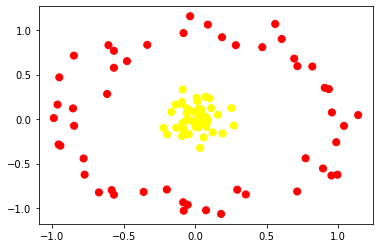

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

[[ 8.80609082e-02  1.06048981e+00]
 [-5.68415706e-01 -8.49454485e-01]
 [ 9.33599343e-01  3.36272891e-01]
 [ 3.53294633e-01 -8.47137978e-01]
 [ 1.03946884e+00 -7.70866620e-02]
 [ 9.85467269e-01 -2.60538258e-01]
 [-5.84280526e-01 -7.98626562e-01]
 [-8.21279882e-02  9.65365336e-01]
 [-5.30373568e-02 -9.63120505e-01]
 [-9.42697210e-01 -2.99564679e-01]
 [-3.35410027e-01  8.32828626e-01]
 [-8.48116938e-01  7.12314084e-01]
 [ 8.18000715e-01  5.89777187e-01]
 [ 6.91329168e-01  6.78350161e-01]
 [ 7.70927979e-01 -4.41126139e-01]
 [-8.54295529e-01  1.19147747e-01]
 [-9.55080080e-01 -2.85333375e-01]
 [-8.46893816e-01 -7.58749136e-02]
 [ 1.13827773e+00  4.42690846e-02]
 [ 7.54113920e-02 -1.02468654e+00]
 [-6.15938597e-01  2.81369152e-01]
 [ 7.12147751e-01 -8.13706711e-01]
 [-7.73432803e-01 -6.24982997e-01]
 [ 6.04076143e-01  8.98607658e-01]
 [-3.59922353e-02  1.15437176e+00]
 [-5.68780196e-01  7.66778590e-01]
 [ 5.58483799e-01  1.06762075e+00]
 [-6.73229374e-01 -8.24316827e-01]
 [ 2.93393739e-01 -7

AttributeError: 'NoneType' object has no attribute 'head'

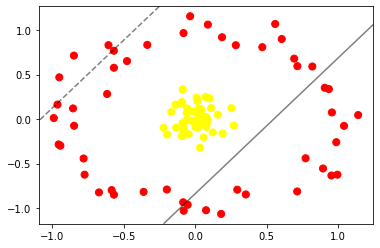

In [13]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)


In [11]:
r = np.exp(-(X**2).sum(1))

In [12]:
r

array([0.97318355, 0.32226105, 0.35180813, 0.95496776, 0.37355606,
       0.43064989, 0.98113112, 0.33741629, 0.35379914, 0.37561593,
       0.39114567, 0.93499363, 0.99681198, 0.98641765, 0.39439037,
       0.99873635, 0.96121573, 0.37590568, 0.93891205, 0.44659488,
       0.29326059, 0.9991809 , 0.36169199, 0.95594307, 0.99059969,
       0.98264551, 0.39137271, 0.93349391, 0.4543342 , 0.47520118,
       0.99249924, 0.99479006, 0.97300237, 0.37024398, 0.89950249,
       0.48530091, 0.96626639, 0.27317684, 0.95610564, 0.97301434,
       0.92439284, 0.98601123, 0.34795943, 0.95580298, 0.99286348,
       0.98625978, 0.99771352, 0.63220033, 0.99270271, 0.31059265,
       0.99193695, 0.37202209, 0.3096218 , 0.99909742, 0.26345582,
       0.40193684, 0.96273277, 0.9937469 , 0.23416759, 0.99545051,
       0.32215064, 0.48845549, 0.9427433 , 0.96093037, 0.34785714,
       0.99310984, 0.93802712, 0.44688669, 0.41529773, 0.46404553,
       0.92470798, 0.96906039, 0.99778406, 0.99197098, 0.99479

In [20]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1], r , c=Y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel('x[0]')
    ax.set_ylabel('y[1]')
    ax.set_zlabel('r')

In [23]:



interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180], 
         X=fixed(X), Y=fixed(Y), r=fixed(r))




interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.10469749e-01,  1.22388750e-01],
       [ 8.80609082e-02,  1.06048981e+00],
       [-5.68415706e-01, -8.49454485e-01],
       [ 5.84900733e-02, -2.06534762e-01],
       [ 9.33599343e-01,  3.36272891e-01],
       [ 3.53294633e-01, -8.47137978e-01],
       [-7.97041051e-02, -1.12678404e-01],
       [ 1.03946884e+00, -7.70866620e-02],
       [ 9.85467269e-01, -2.60538258e-01],
       [-5.84280526e-01, -7.98626562e-01],
       [-8.21279882e-02,  9.65365336e-01],
       [ 7.24427057e-02,  2.48932950e-01],
       [ 3.00841473e-02,  4.78335826e-02],
       [ 4.08106789e-02,  1.09589794e-01],
       [-5.30373568e-02, -9.63120505e-01],
       [-9.77864885e-04, -3.55456193e-02],
       [-9.96848471e-02,  1.72102718e-01],
       [-9.42697210e-01, -2.99564679e-01],
       [ 1.91119489e-01, -1.62809117e-01],
       [-3.35410027e-01,  8.32828626e-01],
       [-8.48116938e-01,  7.12314084e-01],
       [ 2.64288200e-02,  1.09979848e-02],
       

In [24]:
rbf = SVC(kernel='rbf', C=1000000)
rbf.fit(X,Y)

SVC(C=1000000)

[[-0.33541003  0.83282863]
 [ 0.77092798 -0.44112614]
 [-0.6159386   0.28136915]
 [ 0.29339374 -0.79399435]
 [ 0.28340805  0.82912754]
 [-0.19870863 -0.79179408]
 [-0.47720054  0.65037615]
 [ 0.95473553  0.07370794]
 [ 0.03395194 -0.32366761]
 [-0.08784818  0.331718  ]]


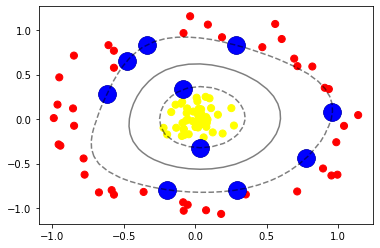

In [30]:
# Incorporan los puntos

plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn") 

# Incorporamos lineas

plt_svc(rbf) 
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")


## Ajustar los parametros de SVM

In [32]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

[[0.26604148 2.71915015]
 [2.79207378 3.14029479]
 [1.1167688  2.45256061]]


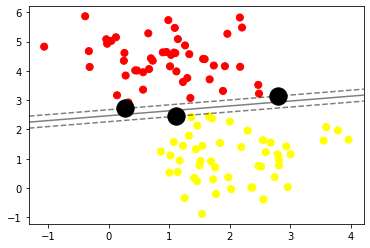

In [46]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=100)
model.fit(X,Y)
plt_svc(model)

Permite que algunos puntos esten en el margen cambiado, lo que da un mejor ajuste

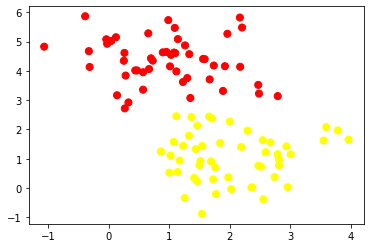

In [36]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")


[[0.26604148 2.71915015]
 [2.79207378 3.14029479]
 [1.1167688  2.45256061]]
[[0.26604148 2.71915015]
 [1.34880003 3.07479238]
 [1.88779063 3.31592667]
 [0.13742771 3.16777298]
 [2.79207378 3.14029479]
 [2.48279064 3.22558008]
 [2.47031647 3.52196502]
 [1.66781904 3.71005531]
 [0.32575305 2.92276125]
 [0.56762597 3.35928158]
 [3.59362114 2.08207549]
 [1.46361712 2.13207534]
 [2.29385806 1.95877238]
 [1.70714468 2.37707464]
 [2.00067424 2.26833784]
 [1.1167688  2.45256061]
 [1.65684156 2.4412893 ]
 [1.36628697 2.42571562]
 [1.32500974 1.79127669]
 [1.07491911 1.57315404]]


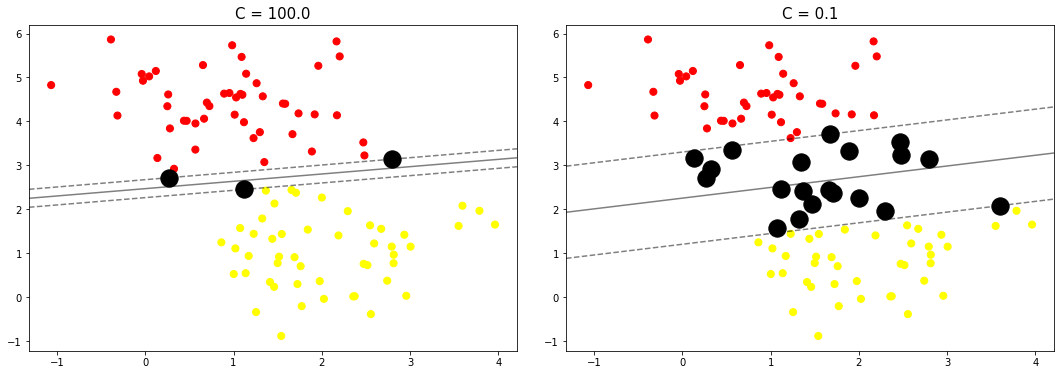

In [41]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.06, right = 0.95, wspace = 0.1)

for ax_i, C in zip(ax, [100.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size=15)
    